In [15]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib as plt
import random
import igraph as ig

In [16]:
import random

# Number of nodes
num_nodes = 20

# Create an empty list to store edges
edges = []

# Generate random edges using a loop
for i in range(num_nodes):
    # Generate a random number of edges for the current node
    num_edges = random.randint(1, 5)  # You can adjust the range as needed

    # Generate random edges to other nodes
    for _ in range(num_edges):
        target_node = random.randint(1, num_nodes)
        
        # Ensure the edge is not a self-loop
        while target_node == i + 1:
            target_node = random.randint(1, num_nodes)
        
        edges.append((i + 1, target_node))

# Print the generated edges
for edge in edges:
    print(edge)

(1, 2)
(1, 18)
(1, 5)
(2, 15)
(2, 8)
(2, 11)
(2, 6)
(2, 8)
(3, 5)
(3, 9)
(3, 11)
(4, 8)
(4, 9)
(4, 16)
(4, 5)
(4, 8)
(5, 11)
(5, 15)
(5, 15)
(6, 3)
(6, 14)
(6, 19)
(7, 20)
(7, 14)
(7, 9)
(7, 17)
(8, 10)
(9, 7)
(10, 2)
(11, 13)
(12, 9)
(12, 6)
(12, 17)
(13, 1)
(13, 14)
(13, 1)
(14, 4)
(14, 15)
(15, 9)
(15, 4)
(15, 14)
(15, 8)
(16, 20)
(16, 9)
(16, 10)
(16, 12)
(16, 8)
(17, 4)
(18, 2)
(18, 11)
(18, 9)
(19, 14)
(19, 6)
(19, 15)
(20, 16)
(20, 4)
(20, 8)
(20, 6)
(20, 3)


In [17]:
# Create a pandas DataFrame from the edges list
df = pd.DataFrame(edges, columns=['Source', 'Target'])

# Print the DataFrame
print(df)

    Source  Target
0        1       2
1        1      18
2        1       5
3        2      15
4        2       8
5        2      11
6        2       6
7        2       8
8        3       5
9        3       9
10       3      11
11       4       8
12       4       9
13       4      16
14       4       5
15       4       8
16       5      11
17       5      15
18       5      15
19       6       3
20       6      14
21       6      19
22       7      20
23       7      14
24       7       9
25       7      17
26       8      10
27       9       7
28      10       2
29      11      13
30      12       9
31      12       6
32      12      17
33      13       1
34      13      14
35      13       1
36      14       4
37      14      15
38      15       9
39      15       4
40      15      14
41      15       8
42      16      20
43      16       9
44      16      10
45      16      12
46      16       8
47      17       4
48      18       2
49      18      11
50      18       9
51      19  

In [18]:
# Create an igraph Graph from the list of edges
# Assuming your DataFrame has 'Source' and 'Target' columns

# Create an igraph Graph from the DataFrame
edges = list(zip(df['Source'], df['Target']))
G = ig.Graph(edges)

# Define a function to calculate the exclusive neighborhood
def exclusive_neighborhood(graph, v, Vp):
    Nv = set(graph.neighborhood(v))
    NVpll = graph.neighborhood(list(Vp))
    NVp = set([u for sublist in NVpll for u in sublist])
    return Nv - NVp

# Define a function to extend the subgraph
def extend_subgraph(graph, Vsubgraph, Vextension, v, k, k_subgraphs):
    if len(Vsubgraph) == k:
        k_subgraphs.append(Vsubgraph)
        return
    while len(Vextension) > 0:
        w = random.choice(tuple(Vextension))
        Vextension.remove(w)
        NexclwVsubgraph = exclusive_neighborhood(graph, w, Vsubgraph)
        VpExtension = Vextension | set([u for u in NexclwVsubgraph if u > v])
        extend_subgraph(graph, Vsubgraph | set([w]), VpExtension, v, k, k_subgraphs)
    return

# Define a function to enumerate subgraphs
def enumerate_subgraphs(graph, k):
    k_subgraphs = []
    for vertex_obj in graph.vs:
        v = vertex_obj.index
        Vextension = set([u for u in graph.neighbors(v) if u > v])
        extend_subgraph(graph, set([v]), Vextension, v, k, k_subgraphs)
    return k_subgraphs

# Enumerate subgraphs of size 4
sgset = enumerate_subgraphs(G, 4)
subgraph_isoclass_list = [G.subgraph(list(sg)).isoclass() for sg in sgset]

# Count occurrences of subgraph isoclasses
from collections import Counter
counter = Counter(subgraph_isoclass_list)
print(counter)

Counter({6: 449, 7: 139, 4: 128, 8: 35, 9: 20, 10: 1})


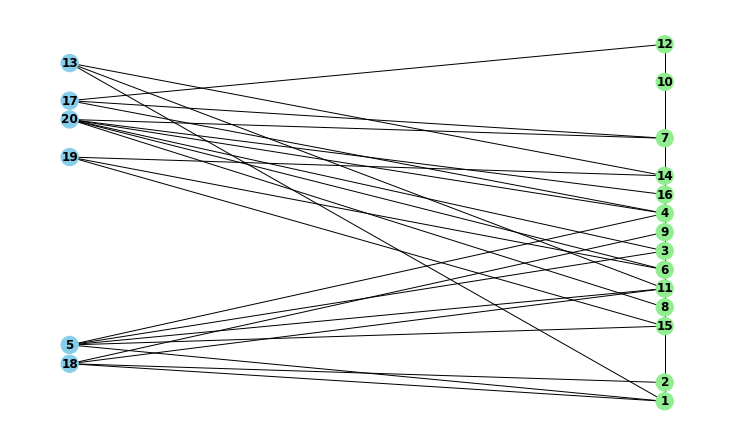

In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create a bipartite graph using NetworkX
B = nx.Graph()

# Add 'Source' nodes to one node set and 'Target' nodes to another node set
for index, row in df.iterrows():
    B.add_node(row['Source'], bipartite=0)
    B.add_node(row['Target'], bipartite=1)
    B.add_edge(row['Source'], row['Target'])

# Draw the bipartite graph using Matplotlib
plt.figure(figsize=(10, 6))  # Set the size of the figure
pos = {node: (0, i) for i, node in enumerate(B.nodes) if B.nodes[node]['bipartite'] == 0}
pos.update({node: (1, i) for i, node in enumerate(B.nodes) if B.nodes[node]['bipartite'] == 1})

# Assign node colors based on bipartite sets
node_colors = ['skyblue' if B.nodes[node]['bipartite'] == 0 else 'lightgreen' for node in B.nodes]

nx.draw(B, pos, with_labels=True, font_weight='bold', node_size=300, node_color=node_colors)
plt.show()


C:\Users\shahe\AppData\Local\Temp\ipykernel_15192\821366249.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Motif_count_per_network = Motif_count_per_network.append(df2)


,0,1,2,3,4,5,6,7,8,9,10,networks
0,NaN,NaN,NaN,NaN,13.009448,NaN,-9.722165,-26.710552,-4.019287,-8.04456,-66.323,networkxmotif


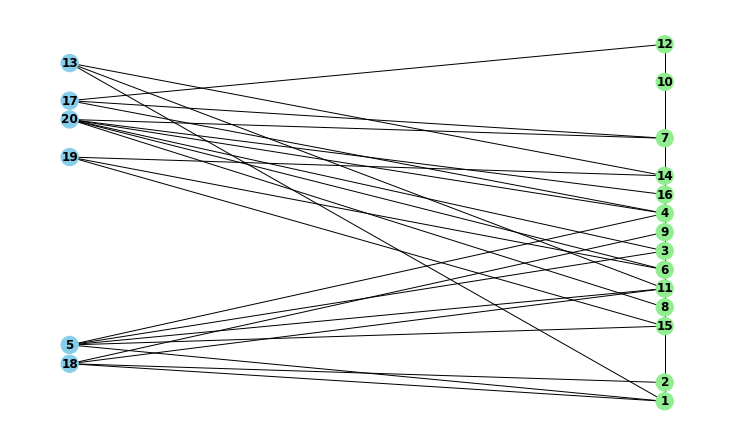

In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from igraph import Graph
Motif_count_per_network = pd.DataFrame()

# Create a bipartite graph using NetworkX
B = nx.Graph()

# Add 'Source' nodes to one node set and 'Target' nodes to another node set
for index, row in df.iterrows():
    B.add_node(row['Source'], bipartite=0)
    B.add_node(row['Target'], bipartite=1)
    B.add_edge(row['Source'], row['Target'])

# Draw the bipartite graph using Matplotlib
plt.figure(figsize=(10, 6))  # Set the size of the figure
pos = {node: (0, i) for i, node in enumerate(B.nodes) if B.nodes[node]['bipartite'] == 0}
pos.update({node: (1, i) for i, node in enumerate(B.nodes) if B.nodes[node]['bipartite'] == 1})

# Assign node colors based on bipartite sets
node_colors = ['skyblue' if B.nodes[node]['bipartite'] == 0 else 'lightgreen' for node in B.nodes]

nx.draw(B, pos, with_labels=True, font_weight='bold', node_size=300, node_color=node_colors)

# Create a unipartite projection (e.g., projecting onto the 'Source' nodes)
unipartite_graph = nx.bipartite.weighted_projected_graph(B, nodes=[n for n, d in B.nodes(data=True) if d['bipartite'] == 0])

# Convert the unipartite graph to an igraph object
fam = nx.to_numpy_matrix(unipartite_graph)
H = Graph.Adjacency(fam.tolist(), "undirected")

# Calculate motif counts using the previous code
motif_count_1 = H.motifs_randesu(size=4)
ran_motifs_1 = []

for i in range(0, 1000):
    I1 = Graph.Erdos_Renyi(H.vcount(), m=H.ecount())
    ran_motif_count1 = I1.motifs_randesu(size=4)
    ran_motifs_1.append(ran_motif_count1)

ran_motifs_np1 = np.asarray(ran_motifs_1)
ran_motifs_np1 = np.nan_to_num(ran_motifs_np1)
ran_motifs_mean1 = np.mean(ran_motifs_np1, axis=0)
ran_motifs_std1 = np.std(ran_motifs_np1, axis=0)
ran_motifs_std1[10] = 1

# Calculate motif significance as before
Motif_significance = (motif_count_1 - ran_motifs_mean1) / ran_motifs_std1

# Create a DataFrame to store motif significance
df2 = pd.DataFrame(Motif_significance)
df2 = df2.transpose()
df2['networks'] = ["networkxmotif"]

# Append the motif significance data to your main DataFrame if you have one
Motif_count_per_network = Motif_count_per_network.append(df2)

Motif_count_per_network
